<a href="https://colab.research.google.com/github/surbhi139/heart-rate-prediction/blob/main/heart_rate_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

importing the dataset

In [ ]:
data = pd.read_csv("heart.csv")

check if there is any missing values is present or not

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


there is no missing values therefore we continue forward

Summary of the data

In [ ]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
print(x)

[[40 'M' 'ATA' ... 'N' 0.0 'Up']
 [49 'F' 'NAP' ... 'N' 1.0 'Flat']
 [37 'M' 'ATA' ... 'N' 0.0 'Up']
 ...
 [57 'M' 'ASY' ... 'Y' 1.2 'Flat']
 [57 'F' 'ATA' ... 'N' 0.0 'Flat']
 [38 'M' 'NAP' ... 'N' 0.0 'Up']]


In [ ]:
print(y)

[0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1
 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0
 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0
 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0
 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0
 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1
 1 1 1 1 1 0 1 0 1 1 1 1 

In [ ]:
from sklearn.preprocessing import OneHotEncoder
x=OneHotEncoder().fit_transform(data).toarray()
print(x)

[[0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 1. 0.]]


In [ ]:
 # Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 1)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 1. 0.]]
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
[1 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 1
 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1
 1 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1
 0 1 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0
 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1
 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0
 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0
 1 1 1 1 1 1 

In [ ]:
X_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 1:] = sc.fit_transform(X_train[:, 1:])
X_test[:, 1:] = sc.transform(X_test[:, 1:])
print(X_train)
print(X_test)

[[ 0.         -0.07405714 -0.04267896 ... -0.89625816 -0.93655385
   0.93655385]
 [ 0.         -0.07405714 -0.04267896 ...  1.11574995  1.06774427
  -1.06774427]
 [ 0.         -0.07405714 -0.04267896 ... -0.89625816 -0.93655385
   0.93655385]
 ...
 [ 0.         -0.07405714 -0.04267896 ...  1.11574995 -0.93655385
   0.93655385]
 [ 0.         -0.07405714 -0.04267896 ... -0.89625816  1.06774427
  -1.06774427]
 [ 0.         -0.07405714 -0.04267896 ...  1.11574995  1.06774427
  -1.06774427]]
[[ 0.         -0.07405714 -0.04267896 ... -0.89625816 -0.93655385
   0.93655385]
 [ 0.         -0.07405714 -0.04267896 ... -0.89625816 -0.93655385
   0.93655385]
 [ 0.         -0.07405714 -0.04267896 ... -0.89625816 -0.93655385
   0.93655385]
 ...
 [ 0.         -0.07405714 -0.04267896 ... -0.89625816 -0.93655385
   0.93655385]
 [ 0.         -0.07405714 -0.04267896 ...  1.11574995  1.06774427
  -1.06774427]
 [ 0.         -0.07405714 -0.04267896 ... -0.89625816 -0.93655385
   0.93655385]]


In [ ]:
# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score,recall_score,roc_auc_score,precision_score,f1_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc=accuracy_score(y_test, y_pred)
pre=precision_score(y_test, y_pred)
print("accuracy = ",acc)
print("precision = ",pre)
f1=f1_score(y_test, y_pred)
print("F1 - SCORE =",f1)
roc = roc_auc_score(y_test, y_pred)
print("roc_auc_cure = ",roc)
re=recall_score(y_test, y_pred)
print("recall = ",re)

[[152   1]
 [  2 213]]
accuracy =  0.9918478260869565
precision =  0.9953271028037384
F1 - SCORE = 0.9930069930069931
roc_auc_cure =  0.9920808633530932
recall =  0.9906976744186047


EXPLORATORY DATA ANALYSIS

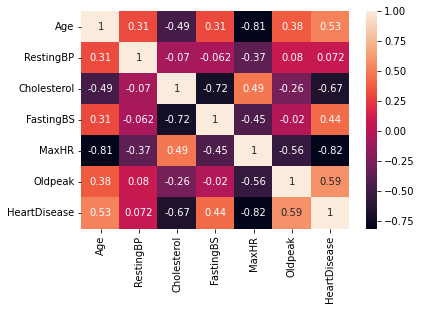

In [ ]:
cor=data.corr()
ax=sns.heatmap(cor.corr(),annot=True)

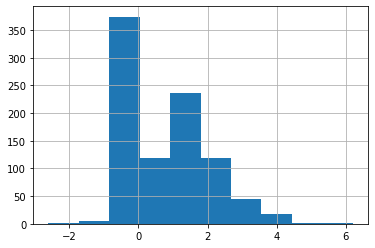

In [ ]:
data["Oldpeak"].hist()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Age of Heart Diseased\n')

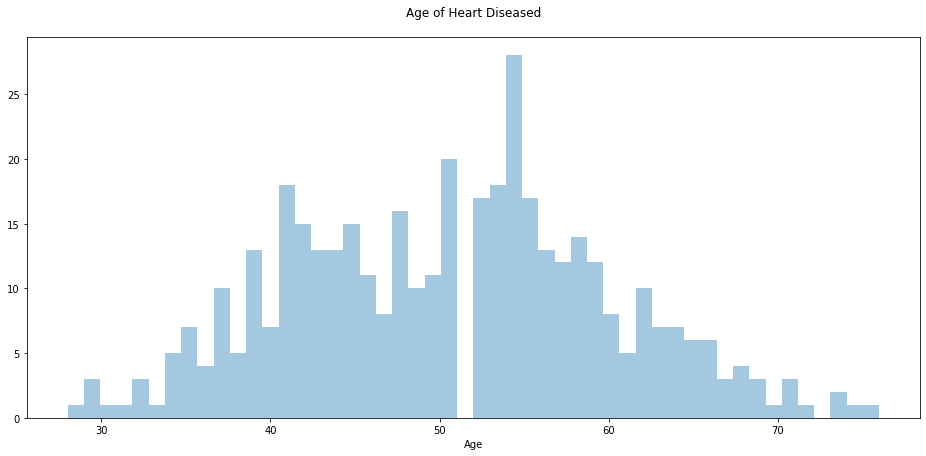

In [ ]:
plt.figure(figsize=(16,7))
sns.distplot(data[data['HeartDisease']==0]['Age'],kde=False,bins=50)
plt.title('Age of Heart Diseased\n')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'PULSE RATE of Heart Diseased\n')

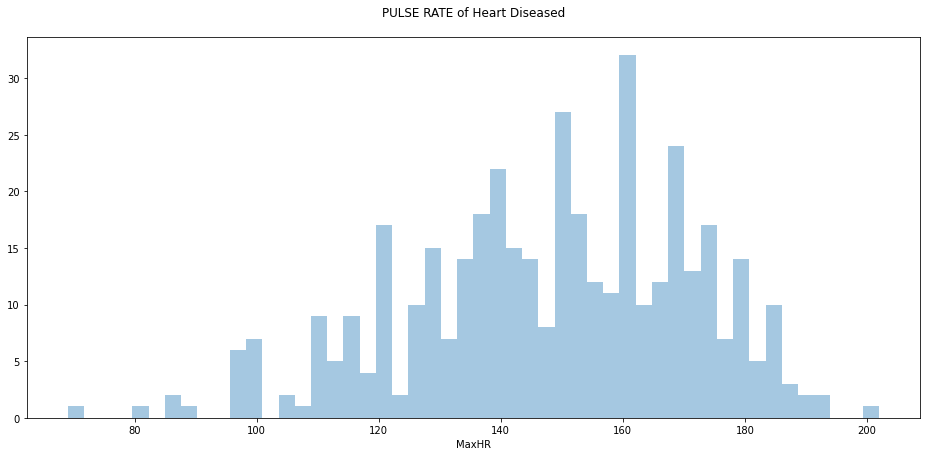

In [ ]:
plt.figure(figsize=(16,7))
sns.distplot(data[data['HeartDisease']==0]['MaxHR'],kde=False,bins=50)
plt.title('PULSE RATE of Heart Diseased\n')

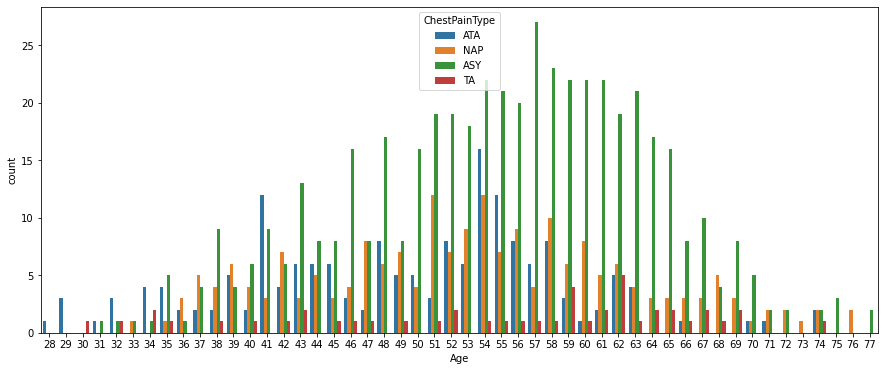

In [ ]:
#occurance of CVD across age
plt.figure(figsize=(15,6))
sns.countplot(x='Age',data = data,hue='ChestPainType')
plt.show()

In [ ]:
from plotly.offline import iplot, init_notebook_mode #visualization
import plotly.express as px #visualization
from plotly.subplots import make_subplots #visualization
import plotly.graph_objects as go #visualization

In [ ]:
#creating a copy of dataset for the visualization
eda= data.copy()
#change values to make better visualizations
eda['Sex'] = np.where(eda['Sex'] == 'F', 'Female', 'Male')
eda['HeartDisease'] = np.where(eda['HeartDisease'] == 0, 'Normal', 'Heart Disease')
eda['ExerciseAngina'] = np.where(eda['ExerciseAngina'] == 'N', 'No', 'Yes')
eda["ChestPainType"].replace({'TA': 'Typical Angina', 'ATA': 'Atypical Angina', 
                              'NAP': 'Non-Anginal Pain', 'ASY': 'Asymptomatic'}, inplace= True)
eda["ST_Slope"].replace({'Up': 'Upsloping', 'Down': 'Downsloping',}, inplace= True)

In [ ]:
#barplot of heart failure by gender 
my_scale = ['rgb(70,81,242)','rgb(255,105,180)']
#histogram with plotly
df = px.data.tips()
fig = px.histogram(eda, x="HeartDisease",
             color='Sex', barmode='group', 
             color_discrete_sequence =my_scale, opacity=0.9,text_auto=True,
             height=450, width = 450)
fig.update_layout(title_text='Heart failure by Sex',title_font_size=16, title_x=0.5,
                  font_family='Bahnschrift SemiBold', 
                  yaxis_title=None, xaxis_title=None)
fig.update_traces(textfont_size=14, textangle=0, textposition="outside", cliponaxis=False,
                 marker_line_width=1,marker_line_color="black")


fig.show()

Text(0.5, 1.0, 'peak exercising VS Target')

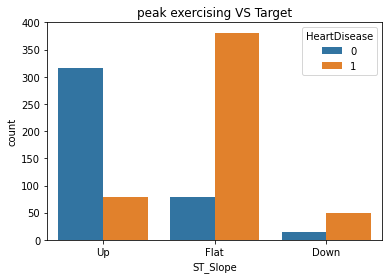

In [ ]:
#relationship between peak exercising(slope) and target.
sns.countplot(data=data,x='ST_Slope',hue='HeartDisease')
plt.title('peak exercising VS Target')

Text(0.5, 1.0, 'chestpaintype VS Target')

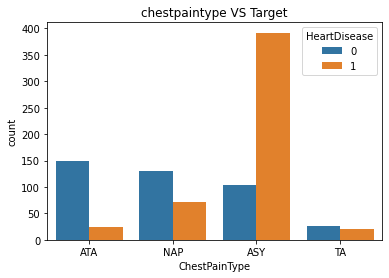

In [ ]:
#relationship between peak exercising(slope) and target.
sns.countplot(data=data,x='ChestPainType',hue='HeartDisease')
plt.title('chestpaintype VS Target')

Text(0.5, 1.0, 'peak exercising VS Target')

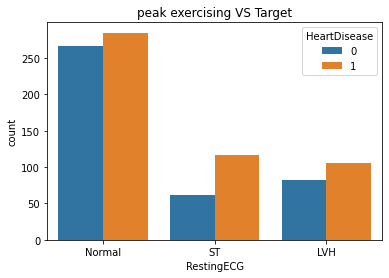

In [ ]:
#relationship between peak exercising(slope) and target.
sns.countplot(data=data,x='RestingECG',hue='HeartDisease')
plt.title('peak exercising VS Target')

Text(0.5, 1.0, 'peak exercising VS Target')

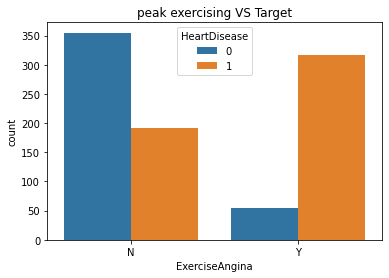

In [ ]:
#relationship between peak exercising(slope) and target.
sns.countplot(data=data,x='ExerciseAngina',hue='HeartDisease')
plt.title('peak exercising VS Target')

In [ ]:
import pandas as pd
csv = pd.DataFrame(y_pred, columns=["1st"])
csv.to_csv("pred.csv", index=False)
da=pd.DataFrame(y_test, columns =["1st"])
csv.to_csv("data.csv", index=False)


In [ ]:
X_test.shape

(368, 529)